<a class="anchor" id="0"></a>
# [AI-ML-DS : Training for beginners](https://www.kaggle.com/vbmokin/ai-ml-ds-training-for-beginners-in-kaggle). Level 4 (very difficult). 2021
## Kaggle GM, Prof. [@vbmokin](https://www.kaggle.com/vbmokin)
### [Vinnytsia National Technical University](https://vntu.edu.ua/), Ukraine
#### [Chair of the System Analysis and Information Technologies](http://mmss.vntu.edu.ua/index.php/ua/)

### It is recommended to start studying this course from notebooks:
* [AI-ML-DS Training. L1T : Titanic - Decision Tree](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-titanic-decision-tree)
* [AI-ML-DS Training. L1T : NH4 - linear regression](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-nh4-linear-regression)
* [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)
* [BOD prediction in river - 15 regression models](https://www.kaggle.com/vbmokin/bod-prediction-in-river-15-regression-models)

and then move on to this notebook.

## Dataset [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci): solving the problem of medical diagnostics

### This notebook is based on the notebook [Heart Disease - Automatic AdvEDA & FE & 20 models](https://www.kaggle.com/vbmokin/heart-disease-automatic-adveda-fe-20-models)

(In more detail, the technology and results of modeling and forecasting are described in my post: [Automation and visualization of EDA & FE & Model selection](https://www.kaggle.com/getting-started/187917) in **"Getting Started"** Discussion)

### I. Feature engineering (FE)
New features and different combinations of feature pairs are formed. 
There are many techniques for **selection features**, see the example:
- [a collection of notebooks for FE](https://www.kaggle.com/vbmokin/data-science-for-tabular-data-advanced-techniques#3)
- [Titanic - Featuretools (automatic FE&FS)](https://www.kaggle.com/vbmokin/titanic-featuretools-automatic-fe-fs)
- [sklearn library documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)

             
I apply the 7 techniques of features selection and **automatic selection** the best features from them:
 - by the Pearson correlation
 - by the SelectFromModel with LinearSVC
 - by the SelectFromModel with Lasso
 - by the SelectKBest with Chi-2
 - by the Recursive Feature Elimination (RFE) with Logistic Regression
 - by the Recursive Feature Elimination (RFE) with Random Forest
 - by the VarianceThreshold


### II. Automatic EDA
I used packages and methods of automatic EDA with good visualization:

* AV.AutoViz
* pandas-profiling.ProfileReport
* pandas.describe


### III. Preprocessing 
For models from Sklearn library, **scaling and standardization** are applied.


### IV. Model selection 
Modeling is carried out with 20 model-classifier (with tuning and cross-validation):
- Linear Regression, Logistic Regression
- Naive Bayes 
- k-Nearest Neighbors algorithm
- Neural network with Keras
- Support Vector Machines and Linear SVC
- Stochastic Gradient Descent, Gradient Boosting Classifier, RidgeCV, Bagging Classifier
- Decision Tree Classifier, Random Forest Classifier, AdaBoost Classifier, XGB Classifier, LGBM Classifier, ExtraTrees Classifier 
- Gaussian Process Classification
- MLP Classifier (Deep Learning)
- Voting Classifier

For each model, the following are calculated and built:
- **learning curve plot**
- **confusion matrices** for train and test data

4 metrics are automatically calculated for each model and the best models are selected with the highest accuracy on test data and the smallest (less 10) difference between the forecast accuracy of the training and test data at the same time - this choice of model reduces the risks of choosing a model with overfitting.

Your comments, votes and feedback are most welcome.

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import libraries](#1)
1. [Download datasets](#2)
1. [EDA & FE](#3)
    -  [Initial EDA - for FE](#3.1)
    -  [FE](#3.2)
    -  [EDA](#3.3)
1. [Preparing to modeling](#4)
1. [Models tuning](#5)
    -  [Linear Regression](#5.1)
    -  [Logistic Regression](#5.2)
    -  [Decision Tree Classifier](#5.3)
    -  [Decision Tree Classifier with GridSearchCV](#5.4)
    -  [Random Forest Classifier](#5.5)    
    -  [XGB Classifier](#5.6)
    -  [LGBM Classifier](#5.7)
    -  [Neural network - Keras](#5.8)
    -  [Neural network with Dropout - Keras](#5.9)
    -  [MLP Classifier](#5.10)
1. [Models selection](#6)
1. [Conclusion](#7)


## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score

# models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Modeling - NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

## 2. Download datasets <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [ ]:
cv_n_split = 3
random_state = 40
test_train_split_part = 0.2
num_models = 10

In [ ]:
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4] # you can only select some numbers of metrics from metrics_all

In [ ]:
data = pd.read_csv("../input/heart-disease-uci/heart.csv")

In [ ]:
data.head(3)

In [ ]:
data.describe([.05, .95])

In [ ]:
# data = data[(data['chol'] <= 326.9) & (data['oldpeak'] <=3.4)].reset_index(drop=True)
# data

In [ ]:
data.describe()

In [ ]:
data.info()

## 3. EDA & FE<a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

### 3.1. Initial EDA for FE<a class="anchor" id="3.1"></a>

[Back to Table of Contents](#0.1)

1. Pandas Profiling

The next code from in my notebook [FE & EDA with Pandas Profiling](https://www.kaggle.com/vbmokin/fe-eda-with-pandas-profiling)

In [ ]:
#pp.ProfileReport(data)

The analysis revealed the presence of one duplicate line. Let's remove it.

In [ ]:
data = data.drop_duplicates()
data.shape

In [ ]:
data.describe()

The analysis showed that the available features are poorly divided according to the target values. It is advisable to generate a number of new features.

### 3.2. FE<a class="anchor" id="3.2"></a>

[Back to Table of Contents](#0.1)

In [ ]:
data

In [ ]:
def features_creation(df):
    # Features creation
    df['thalach2'] = df['thalach']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    for col1 in ['sex']:
        for col2 in ['oldpeak2', 'thalach2']:
            df[col1 + "_" + col2] = df[col1].astype('str') + "_" + df[col2].astype('str')
    df = df.drop(columns = ['oldpeak2', 'thalach2'])
    return df

In [ ]:
# Features creation
data = features_creation(data)
len(data.columns)

In [ ]:
# Determination categorical features
categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
categorical_columns

In [ ]:
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [ ]:
data

### 3.3. EDA<a class="anchor" id="3.3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
#pp.ProfileReport(data)

In [ ]:
data.describe()

In [ ]:
data.describe().applymap("{0:.1f}".format)

The analysis shows different patterns, but most importantly, it confirms that the features are quite diverse. Some features clustering target values quite well, but there are none that do it with 100% accuracy. Those, a good dataset has been formed, but it is impossible to unambiguously choose the optimal model. There is little data, so any model can overfit.

## 4. Preparing to modeling <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Target
target_name = 'target'
target_all = data.pop(target_name)

In [ ]:
# Standartization data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [ ]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(data, target_all, test_size=test_train_split_part, random_state=random_state)

In [ ]:
train.head(3)

In [ ]:
test.head(3)

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

In [ ]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

In [ ]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [ ]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [ ]:
def plot_cm(target, train_pred, target_test, test_pred):
    # Building the confusion matrices
    
    def cm_calc(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
        cm_sum = np.sum(cm, axis=1, keepdims=True)
        cm_perc = cm / cm_sum.astype(float) * 100
        annot = np.empty_like(cm).astype(str)
        nrows, ncols = cm.shape
        for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = cm_perc[i, j]
                if i == j:
                    s = cm_sum[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)
        cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
        cm.index.name = 'Actual'
        cm.columns.name = 'Predicted'
        return cm, annot

    
    # Building the confusion matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True)
    
    # Training data
    ax = axes[0]
    ax.set_title("for training data")
    cm0, annot0 = cm_calc(target, train_pred)    
    sns.heatmap(cm0, cmap= "YlGnBu", annot=annot0, fmt='', ax=ax)
    
    # Test data
    ax = axes[1]
    ax.set_title("for test (validation) data")
    cm1, annot1 = cm_calc(target_test, test_pred)
    sns.heatmap(cm1, cmap= "YlGnBu", annot=annot1, fmt='', ax=ax)
    
    fig.suptitle('CONFUSION MATRICES', y=1.05)
    plt.show()

In [ ]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2
    
    #  Building the confusion matrices
    plot_cm(target, ytrain, target_test, ytest)

In [ ]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1
    
    # Save the submission file
    submission[target_name] = ytest
    submission.to_csv('submission_' + name_model + '.csv', index=False)    

## 5. Models tuning<a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

Now we are ready to train a model and predict the required solution. There are very many predictive modeling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. With these two criteria - Supervised Learning, we can narrow down our choice of models to a few. These include:

- Linear Regression, Logistic Regression (Sklearn)
- Decision Tree Classifier, Random Forest Classifier (Sklearn)
- XGB Classifier (Xgboost, Google) 
- LGBM Classifier (Lightgbm, Microsoft) 
- Neural network (DL - Keras)
- MLP Classifier (DL - Sklearn)

Some model is built using cross-validation. The parameters of the model are selected to ensure the maximum matching of accuracy on the training and validation data. A plot is being built for this purpose with [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve#sklearn.model_selection.learning_curve) from sklearn library.

In [ ]:
# Thanks to https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    """
    Generate 2 plots: 
    - the test and training learning curve, 
    - the training samples vs fit times curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    
    random_state : random_state
    
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

### 5.1 Linear Regression <a class="anchor" id="5.1"></a>

[Back to Table of Contents](#0.1)

Thanks to notebooks:
* model from [AI-ML-DS Training. L1A: NH4 - linear regression](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-nh4-linear-regression)
* model tuning from [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)

**Linear Regression** is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. Reference [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

Note the confidence score generated by the model based on our training dataset.

In [ ]:
# Linear Regression
linreg = LinearRegression()
linreg_CV = GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(train, target)
acc_metrics_calc(0,linreg_CV,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(linreg, "Linear Regression", train, target, cv=cv_train)

### 5.2 Logistic Regression <a class="anchor" id="5.2"></a>

[Back to Table of Contents](#0.1)

**Logistic Regression** is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv_train, verbose=False)
logreg_CV.fit(train, target)
print(logreg_CV.best_params_)
acc_metrics_calc(1,logreg_CV,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(logreg, "Logistic Regression", train, target, cv=cv_train)

### 5.3 Decision Tree Classifier<a class="anchor" id="5.3"></a>

[Back to Table of Contents](#0.1)

Thanks to notebook [AI-ML-DS Training. L1A: Titanic - Decision Tree](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-titanic-decision-tree)

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [ ]:
# Decision Tree Classifier - simplest model

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=random_state)
decision_tree.fit(train, target)
acc_metrics_calc(2,decision_tree,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(decision_tree, "Decision Tree", train, target, cv=cv_train)

In [ ]:
# Visualization - build a plot with Decision Tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, filled=True, rounded=True, class_names=["1", "0"], feature_names=train.columns) 

### 5.4 Decision Tree Classifier with GridSearchCV<a class="anchor" id="5.4"></a>

[Back to Table of Contents](#0.1)

Thanks to notebooks:
* model from [AI-ML-DS Training. L1A: Titanic - Decision Tree](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l1t-titanic-decision-tree)
* model tuning from [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [ ]:
# Decision Tree Classifier with GridSearchCV

decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(3,decision_tree_CV,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(decision_tree, "Decision Tree with GridSearchCV", train, target, cv=cv_train)

### 5.5 Random Forest Classifier<a class="anchor" id="5.5"></a>

[Back to Table of Contents](#0.1)

Thanks to notebook [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)

**Random Forest** is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [ ]:
%%time
# Random Forest
# Parameters of model (param_grid) taken from the notebook https://www.kaggle.com/morenovanton/titanic-random-forest

random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
acc_metrics_calc(4,random_forest_CV,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(random_forest, "Random Forest", train, target, cv=cv_train)

### 5.6 XGB Classifier<a class="anchor" id="5.6"></a>

[Back to Table of Contents](#0.1)

Thanks to notebook [AI-ML-DS Training. L2A: NH4 - Tree Regress models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l2t-nh4-tree-regress-models)

**XGBoost** is an ensemble tree method that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. XGBoost improves upon the base Gradient Boosting Machines (GBM) framework through systems optimization and algorithmic enhancements. Reference [Towards Data Science.](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

In [ ]:
%%time
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(train, target)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(5,xgb_reg,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(xgb_clf, "XGBoost Classifier", train, target, cv=cv_train)

### 5.7 LGBM Classifier <a class="anchor" id="5.7"></a>

[Back to Table of Contents](#0.1)

**Light GBM** is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. Reference [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/).

In [ ]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
modelL = lgb.LGBMClassifier(n_estimators=1000, num_leaves=40)
modelL.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], early_stopping_rounds=50, verbose=True)

In [ ]:
acc_metrics_calc(6,modelL,train,test,target,target_test)

In [ ]:
fig =  plt.figure(figsize = (10,10))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

### 5.8 Neural network - Keras<a class="anchor" id="5.8"></a>

[Back to Table of Contents](#0.1)

Thanks to [AI-ML-DS Training. L3AT: NH4 - NN models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l3at-nh4-nn-models)

The architecture of neural network:
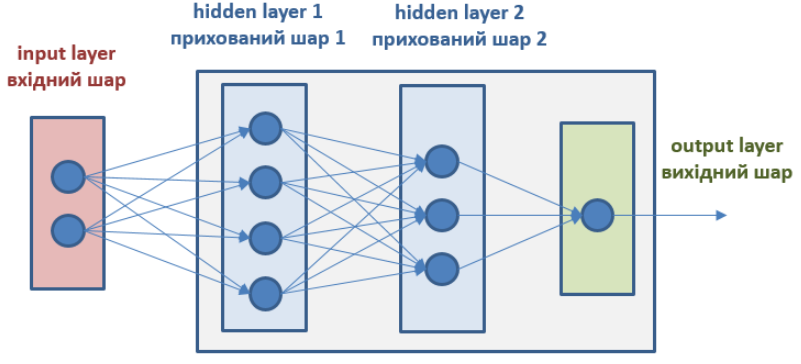

In [ ]:
def build_nn():

    # Initializing the NN with 3 layers including 2 hidden layers
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=16, activation='relu', input_shape=(len(train.columns),)))
    
    # The second hidden layer of the NN
    model.add(Dense(units=8, activation='sigmoid'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                    patience=3, 
                                    verbose=1, 
                                    factor=0.15, 
                                    min_lr=0.0001)
    return model

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
nn_model = build_nn()
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=200, validation_data=(Xval, Zval), verbose=1)

# Drawing metrics plot
plt.plot(nn_model.history.history['val_loss'])
plt.title('Metrics of NN model')
plt.xlabel('Epochs')
plt.ylabel('val_loss') 
plt.show()

acc_metrics_calc(7,nn_model,train,test,target,target_test)

In [ ]:
nn_model.summary()

### 5.9 Neural network with Dropout - Keras<a class="anchor" id="5.9"></a>

[Back to Table of Contents](#0.1)

Thanks to [AI-ML-DS Training. L3AT: NH4 - NN models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l3at-nh4-nn-models)

In [ ]:
def build_nn2():

    # Initializing the NN with 3 layers including 2 hidden layers
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=16, activation='relu', input_shape=(len(train.columns),)))
    
    # Dropout
    model.add(Dropout(0.2))
    
    # The second hidden layer of the NN
    model.add(Dense(units=8, activation='sigmoid'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                    patience=3, 
                                    verbose=1, 
                                    factor=0.15, 
                                    min_lr=0.0001)
    return model

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
nn_model2 = build_nn2()
nn_model2.fit(Xtrain, Ztrain, batch_size=16, epochs=200, validation_data=(Xval, Zval), verbose=0)

# Drawing metrics plot
plt.plot(nn_model2.history.history['val_loss'])
plt.title('Metrics of NN model')
plt.xlabel('Epochs')
plt.ylabel('val_loss') 
plt.show()

acc_metrics_calc(8,nn_model2,train,test,target,target_test)

### 5.10 MLP Classifier<a class="anchor" id="5.10"></a>

[Back to Table of Contents](#0.1)

Thanks to [AI-ML-DS Training. L3AT: NH4 - NN models](https://www.kaggle.com/vbmokin/ai-ml-ds-training-l3at-nh4-nn-models)

The **MLPClassifier** optimizes the squared-loss using LBFGS or stochastic gradient descent by the Multi-layer Perceptron regressor. Reference [Sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

In [ ]:
%%time
# MLPClassifier

mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [100]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(9,mlp_GS,train,test,target,target_test)

In [ ]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

## 6. Models selection <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

We can now rank our evaluation of all the models to choose the best one for our problem.

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Decision Tree Classifier', 'DTC with GridSearchCV',
              'Random Forest Classifier', 'XGB Classifier', 'LGBM Classifier',
              'NN - Keras', 'NN with Dropout', 'MLP Classifier']})

In [ ]:
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']
#models

In [ ]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
for x in metrics_now:   
    # Plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + '_train'
    xs_test = metrics_all[x] + '_test'
    plt.figure(figsize=[15,6])
    xx = models['Model']
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], label = xs_train)
    plt.plot(xx, models[xs_test], label = xs_test)
    plt.legend()
    plt.title(str(xs) + ' criterion for ' + str(num_models) + ' popular models for train and test datasets')
    plt.xlabel('Models')
    plt.ylabel(xs + ', %')
    plt.xticks(xx, rotation='vertical')
    plt.show()

Larger values **r2_score_diff** mean overfitting.

## 7. Conclusion <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [ ]:
# Choose the number of metric by which the best models will be determined =>  {1 : 'r2_score', 2: 'accuracy_score', 3 : 'relative_error', 4 : 'rmse'}
metrics_main = 2 
xs = metrics_all[metrics_main]
xs_train = metrics_all[metrics_main] + '_train'
xs_test = metrics_all[metrics_main] + '_test'
print('The best models by the',xs,'criterion:')
direct_sort = False if (metrics_main >= 2) else True
models_sort = models.sort_values(by=[xs_test, xs_train], ascending=direct_sort)

### The best models:

In [ ]:
# Selection the best models except VotingClassifier
models_best = models_sort[(models_sort.acc_diff < 10) & (models_sort.acc_test > 86)]
models_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

In [ ]:
# Selection the best models from the best
models_best_best = models_best[(models_best.acc_test > 90)]
models_best_best[['Model', ms + '_train', ms + '_test']].sort_values(by=['acc_test'], ascending=False)

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)